# 1. Wine Quality Dataset

First, we import the wine quality data downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/
wine-quality and unzip the folder and install necessary packages



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt  

fc-list: major issue: So far, no MiKTeX administrator has checked for updates.
Fontconfig warning: ignoring UTF-8: not a valid region tag
fc-list: major issue: So far, no MiKTeX administrator has checked for updates.



Next, load both datasets into seperate DataFrames

In [2]:
red_wine = pd.read_csv('wine+quality/winequality-red.csv', delimiter=";")
white_wine = pd.read_csv('wine+quality/winequality-white.csv', delimiter=";")

print(red_wine.head())
print(white_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Add a column on both datasets to indicate the wine type (red or white)

In [3]:
red_wine['wineType'] = 'red'
white_wine['wineType'] = 'white'
print(red_wine.head())
print(white_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wineType  
0      9.4        5      red  
1      9.8        5     

Next, we combine both DataFrames into a single dataframe and set the ignore index parameter = True to reset the index of the combined Dataframe

In [4]:
combined_wine = pd.concat([red_wine, white_wine], ignore_index=True)  

## 1.1 Summary Statistics

We can use describe() in pandas to get the basic statistics of count, mean, std, min,max, and 25:50:75 percentiles. And we could add a column range using method max() - min(), and add a column variance using var() method for features with numeric values (all columns except wineType). For non-numeric feature wineType, we only calculate the count.

In [5]:

summary_statistics = combined_wine.select_dtypes(include=[np.number]).describe()  
summary_statistics.loc['range'] = summary_statistics.max() - summary_statistics.min()  
summary_statistics.loc['variance'] = summary_statistics.var()  
    
# Add count for non-numeric features   
wine_type_statistics = combined_wine.select_dtypes(exclude=[np.number]).describe(include='all')  

summary_statistics.reset_index(inplace=True)
wine_type_statistics.reset_index(inplace=True)

summary_statistics = summary_statistics.merge(wine_type_statistics,on = 'index', how = 'left')

print(summary_statistics)  
summary_statistics.to_csv('summary_statistics.csv')

      index  fixed acidity  volatile acidity   citric acid  residual sugar  \
0     count   6.497000e+03      6.497000e+03  6.497000e+03    6.497000e+03   
1      mean   7.215307e+00      3.396660e-01  3.186332e-01    5.443235e+00   
2       std   1.296434e+00      1.646365e-01  1.453179e-01    4.757804e+00   
3       min   3.800000e+00      8.000000e-02  0.000000e+00    6.000000e-01   
4       25%   6.400000e+00      2.300000e-01  2.500000e-01    1.800000e+00   
5       50%   7.000000e+00      2.900000e-01  3.100000e-01    3.000000e+00   
6       75%   7.700000e+00      4.000000e-01  3.900000e-01    8.100000e+00   
7       max   1.590000e+01      1.580000e+00  1.660000e+00    6.580000e+01   
8     range   6.495704e+03      6.496920e+03  6.497000e+03    6.496400e+03   
9  variance   8.188287e+06      8.206482e+06  8.206587e+06    8.175081e+06   

      chlorides  free sulfur dioxide  total sulfur dioxide       density  \
0  6.497000e+03         6.497000e+03          6.497000e+03  6.497

## 1.2 Data Visualization

### Histogram

Both numeric and non-numeric varaibles could be plotted on historigram. We first use shape to derive the total number of features. The number of rows then could be decided based on the total number of features.

/var/folders/b_/sw4nttp11zj3sjgrzkc3tg1c0000gn/T/ipykernel_92479/3839179487.py:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if combined_wine[column].dtype in [np.number, int, float]:  # Check if the feature is numeric
/var/folders/b_/sw4nttp11zj3sjgrzkc3tg1c0000gn/T/ipykernel_92479/3839179487.py:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if combined_wine[column].dtype in [np.number, int, float]:  # Check if the feature is numeric
/var/folders/b_/sw4nttp11zj3sjgrzkc3tg1c0000gn/T/ipykernel_92479/3839179487.py:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if combined_wine[column].dtype in [np.number, int, float]:  # Check if the feature is numeric
/var/folders/b_/

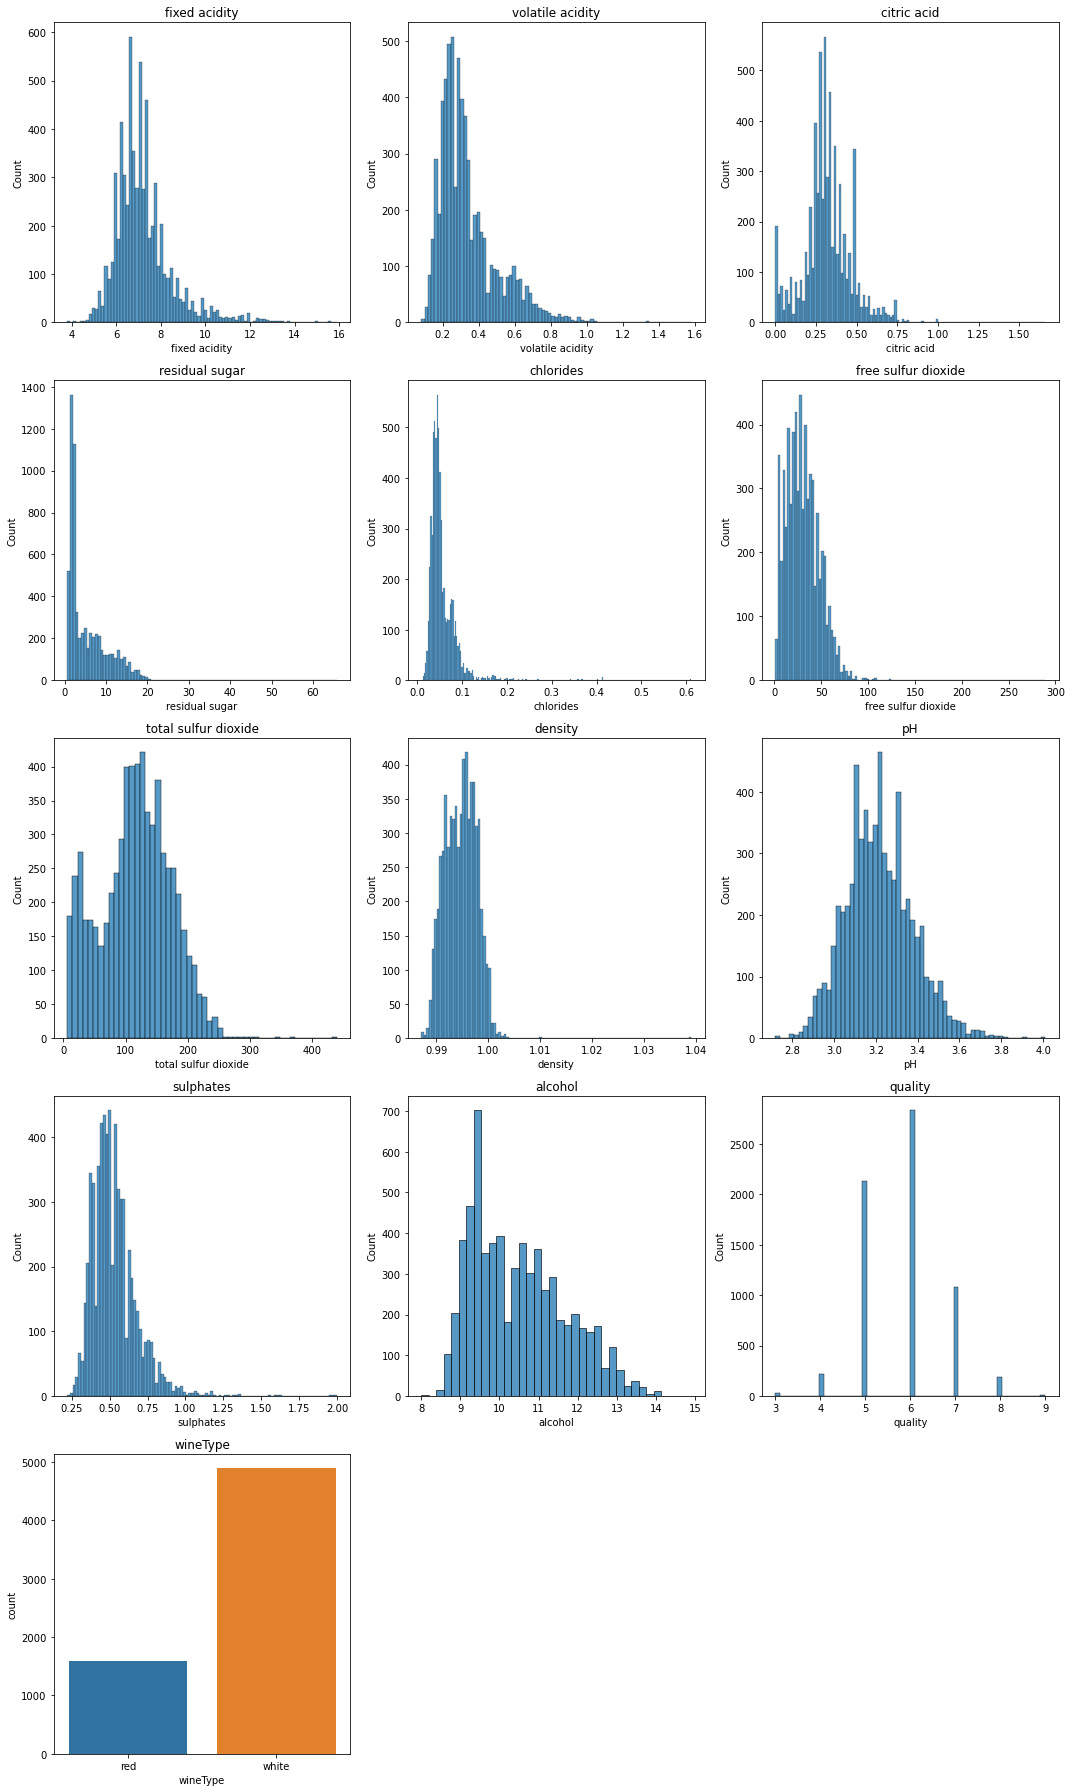

In [6]:
total_features = combined_wine.shape[1]  
rows = (total_features // 3) + 1  
cols = 3  
  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
axes = axes.flatten()  
  
for idx, column in enumerate(combined_wine.columns):  
    if combined_wine[column].dtype in [np.number, int, float]:  # Check if the feature is numeric  
        sns.histplot(data=combined_wine, x=column, kde=False, ax=axes[idx])  
    else:  
        sns.countplot(data=combined_wine, x=column, ax=axes[idx])  
    axes[idx].set_title(column)  
  

for idx in range(total_features, len(axes)):  
    fig.delaxes(axes[idx])  

plt.tight_layout()  
plt.show()  


### Box Plots

Box plots is more for identifying outliers for numeric type varaibles, we first filter out the non-numeric type (column wineType) and then plot the rest of the features

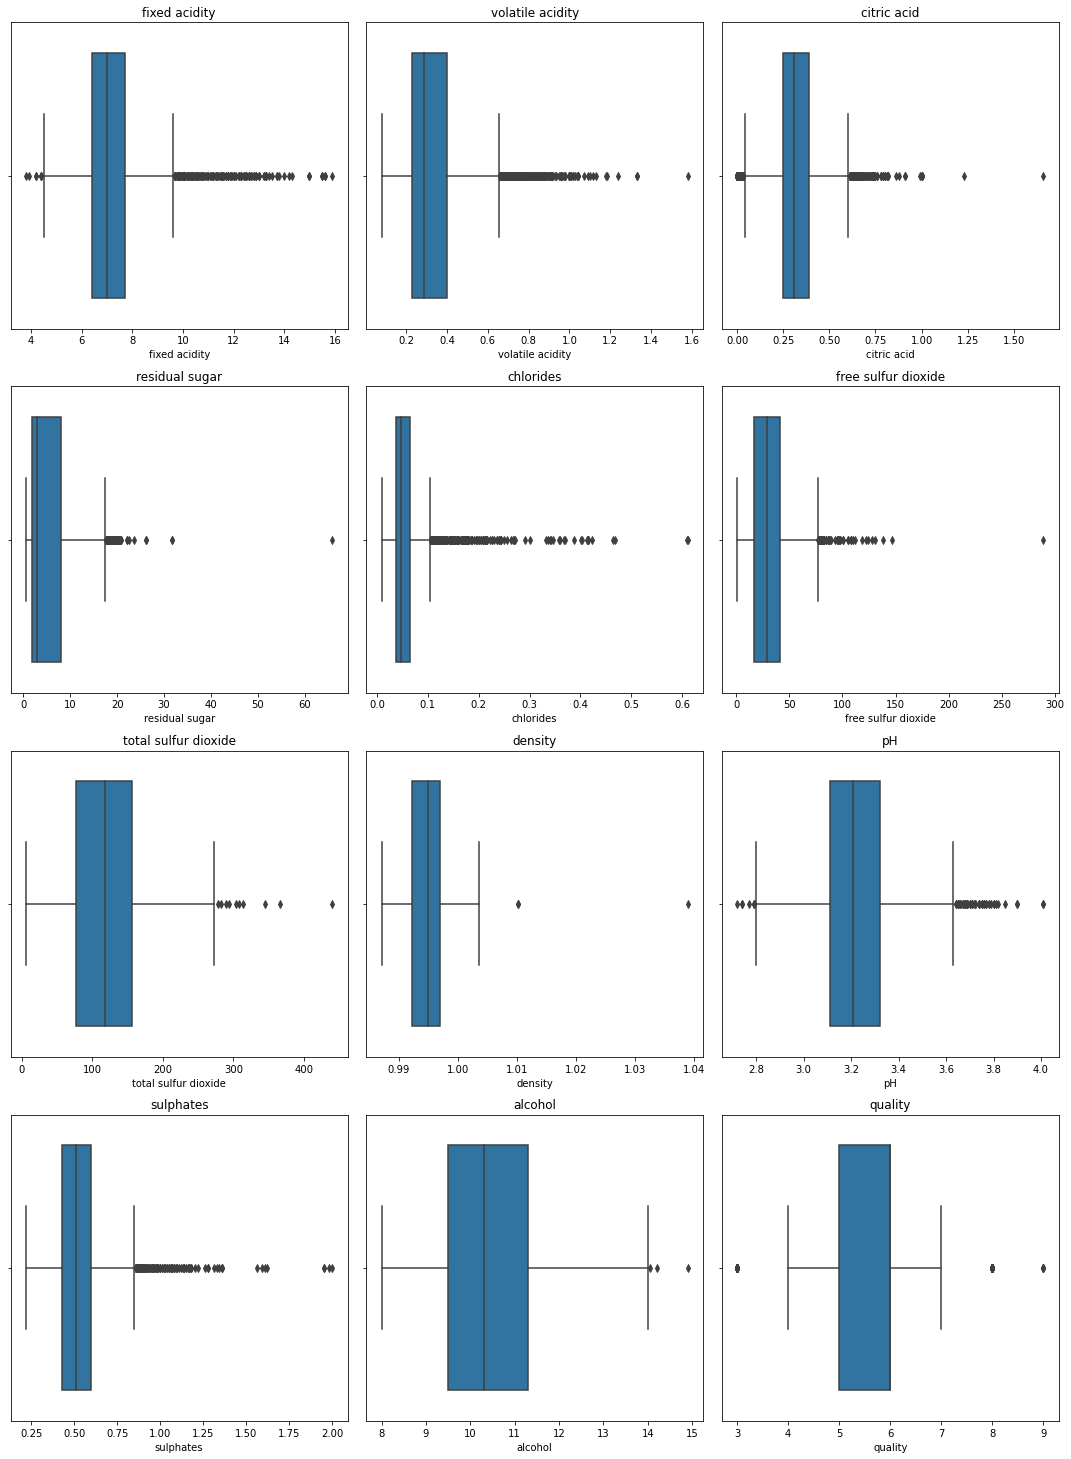

In [7]:
numeric_features = combined_wine.select_dtypes(include=[np.number]).shape[1]  
rows = (numeric_features // 3) + 1  
cols = 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
axes = axes.flatten()  
  
for idx, column in enumerate(combined_wine.select_dtypes(include=[np.number]).columns):  
    sns.boxplot(data=combined_wine, x=column, ax=axes[idx])  
    axes[idx].set_title(column)  

for idx in range(numeric_features, len(axes)):  
    axes[idx].remove()  

plt.tight_layout()  
plt.show()  


### Pairwise Plot

we first make a copy to the dataframe. In the new dataframe, we convert the non-numeric column wineType into numeric, where 0 represents red wine and 1 represents white wine.

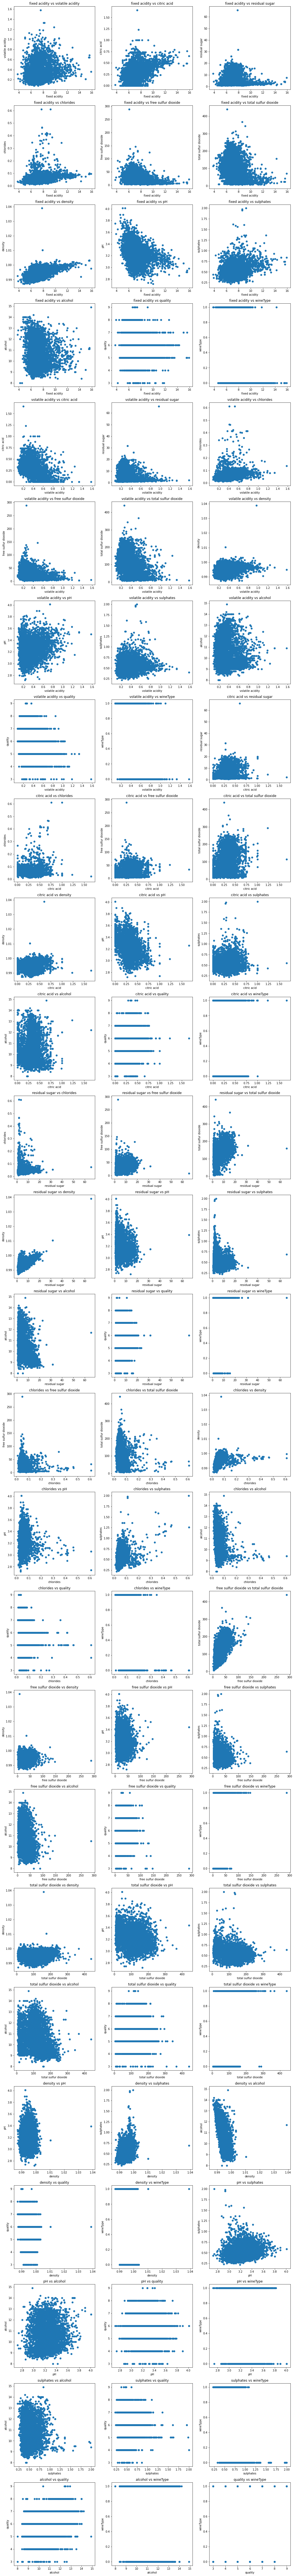

In [8]:
data = combined_wine  
data['wineType'] = data['wineType'].replace({'red': 0, 'white': 1})  
n_features = len(data.columns)  
n_plots = (n_features * (n_features - 1)) // 2  

rows = (n_plots // 3) + 1  
cols = 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
axes = axes.flatten()  
  
plot_index = 0  
for i in range(n_features):  
    for j in range(i + 1, n_features):  
        axes[plot_index].scatter(data.iloc[:, i], data.iloc[:, j])  
  
        axes[plot_index].set_title(f"{data.columns[i]} vs {data.columns[j]}")  
        axes[plot_index].set_xlabel(data.columns[i])  
        axes[plot_index].set_ylabel(data.columns[j])  
  
        plot_index += 1  
  
for i in range(plot_index, len(axes)):  
    fig.delaxes(axes[i])  

plt.tight_layout()  
plt.show()  
 

### Class-wise Visualization

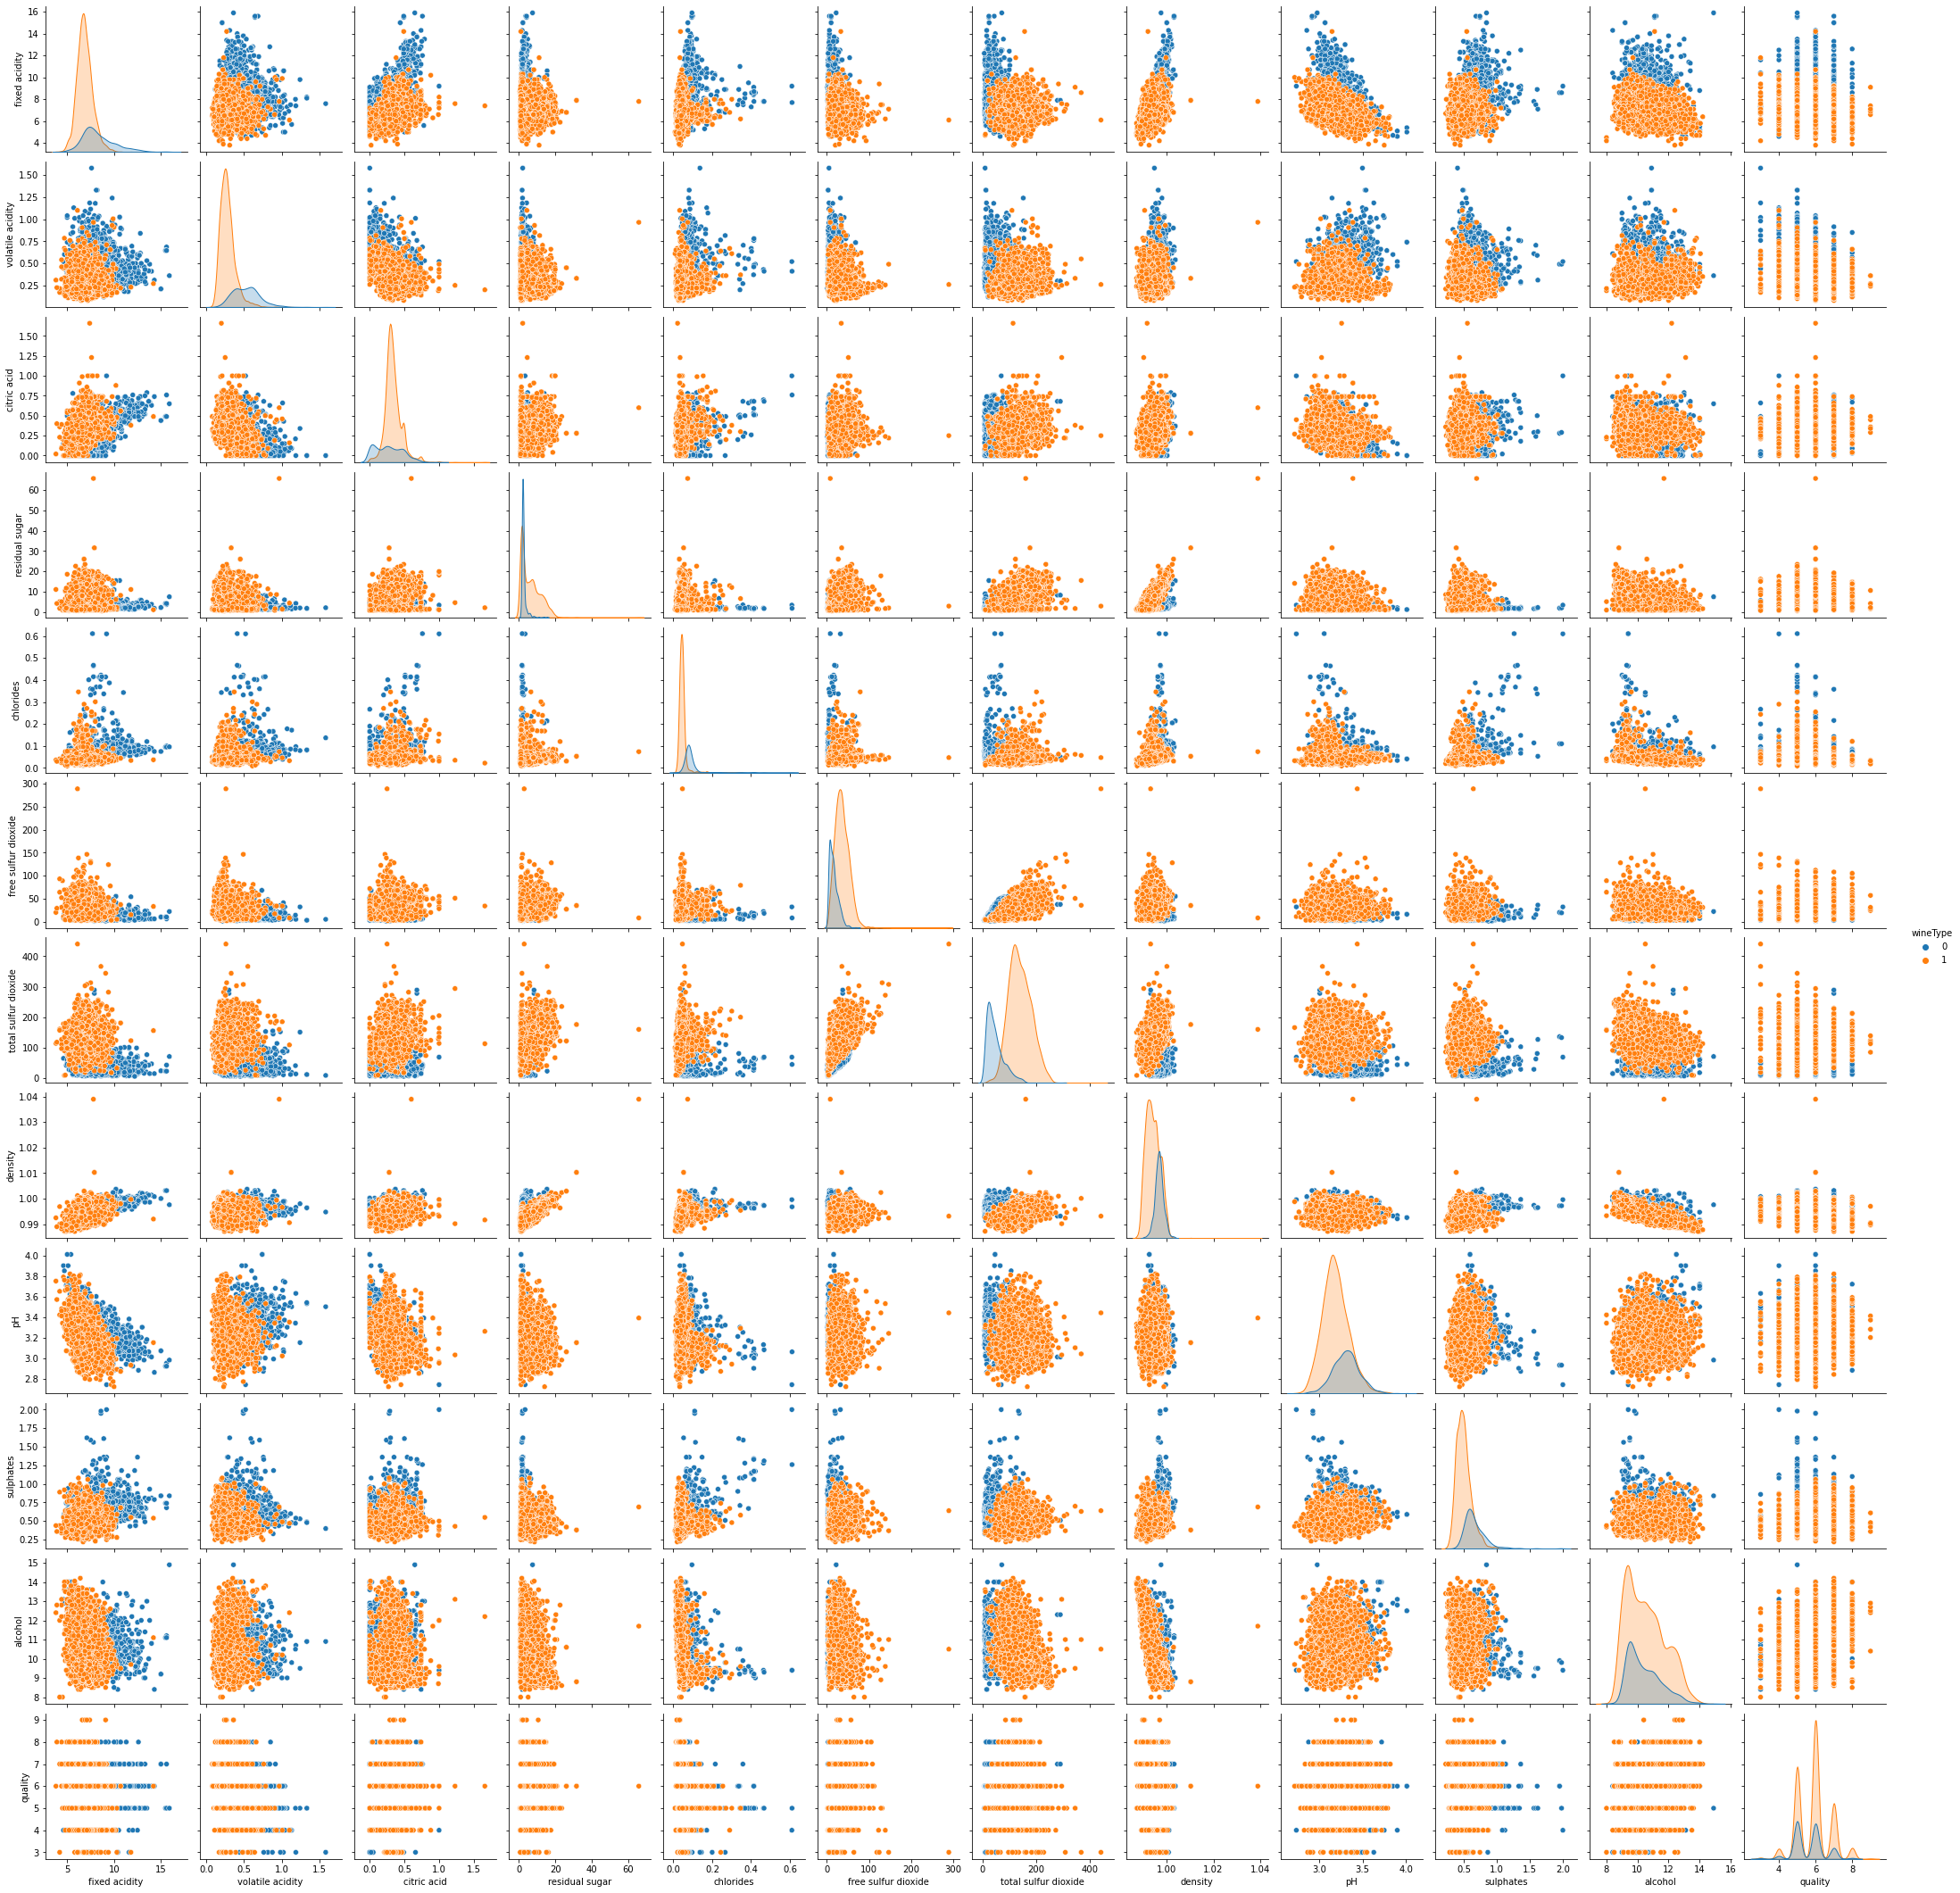

In [9]:
sns.pairplot(combined_wine, hue='wineType')  
plt.show()  

## 1.3 Conceptualized Questions

In [10]:
print("Number of features:", len(combined_wine.columns))  
print("\nFeature types:")  
print(combined_wine.dtypes)  


Number of features: 13

Feature types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wineType                  int64
dtype: object


1. How many features are there? What are the types of the features (e.g., numeric,
nominal, discrete, continuous)?
    - There are 13 features in total. Out of the 13 features, wineType is a nominal feature, quality and free sulfur dioxide are discrete feature, the rest of the features are numeric and continuous.
2. What can you conclude from the histograms about the distribution of the features in
the dataset? Are there any features that are approximately normally distributed? Are
there any features that are highly skewed?
    - Based on the histograms, we could see that pH, total sulfur dioxide, free sulfur dioxide (only slightly right skew), fixed acidity (only slightly right skew), citrix acid and density are approximatly normal distribution.
    - Residual sugar,volatile acidity, sulphates,chlorides and alcohol are right skewed.
    - Quality is a discrete variable. But from it's historgram it has a roughly normal distribution bell-shape.
    - many of the chemical properties, such as pH, total sulfur dioxide, free sulfur dioxide, fixed acidity, citric acid and density, are approximately normally distributed. This is not surprising given the its nature.
    - The most highly skewed feature is residual sugar, which has a long tail to the right, indicating that most wines have relatively low sugar, some sweet wines have much higher levels
3. Based on the box plots, are there any features that appear to have many outliers? Are
there any features that appear to have a similar spread of values across different quality
ratings? Are there any features that appear to have different spreads of values across
different quality ratings?
    - It seems that fixed acidity, volatile acidity, citric acid, residual sugar, chlorides,pH and sulphaet all have many outliers.
    - To answer the  question of whether or not there is any features have similar spread of values across different quality rating, we need to generate boxplots for each features against each quality rating


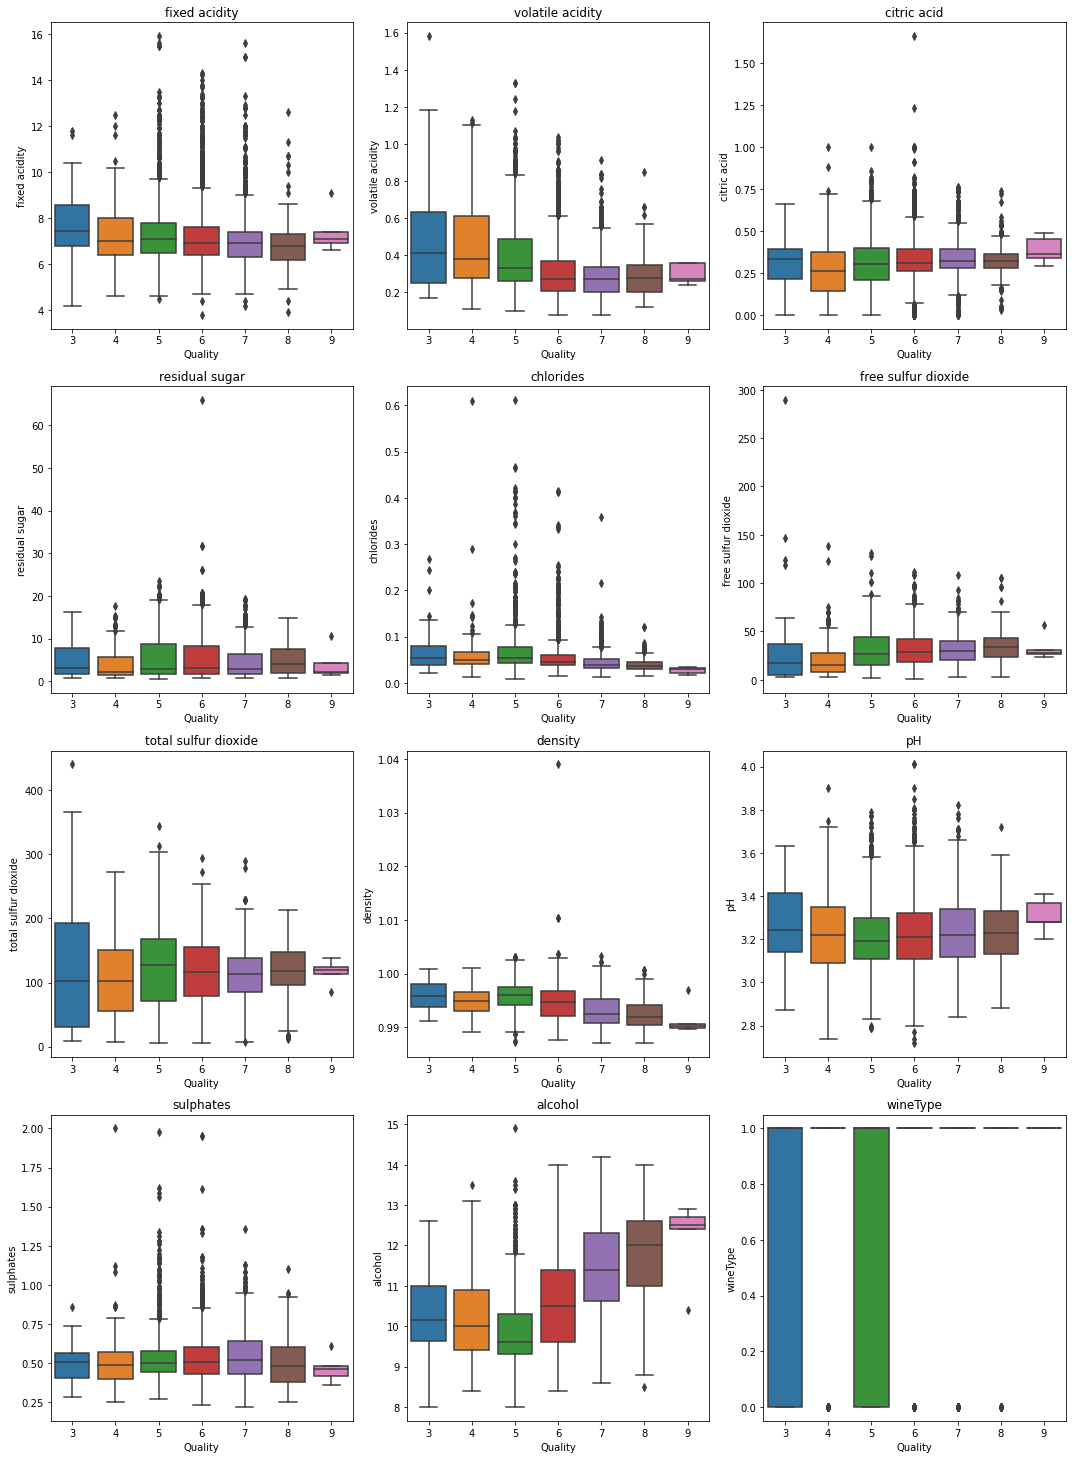

In [11]:
numeric_features = combined_wine.select_dtypes(include=[np.number]).columns.drop('quality')
num_features = len(numeric_features)

rows = (num_features // 3) + 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for idx, column in enumerate(numeric_features):
    sns.boxplot(data=combined_wine, x='quality', y=column, ax=axes[idx])
    axes[idx].set_title(column)
    axes[idx].set_xlabel('Quality')
    axes[idx].set_ylabel(column)

for idx in range(num_features, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

    - Based on the boxp plots, we can see that fixed acidity, citric acid, residual sugar, chlorides and sulphate shows a similar spreads across most quality ratings.
    - We can see a clear upward trend in the median for alcohol for quality more than 5.
    - There is a visible downward trend for median and the overall distribution as quality increases 
    - For total sulfur dioxide, while the median didn't show a strong trend, the spread of values tends to decrease as quality increases.


4. Based on the pairwise plots, which features appear to be highly correlated? Are there
any features that do not appear to be correlated with any other features?
    - Highly correlation features:
        - There is a strong positive correlations between fixed acidity and density, as fixed acidity increases, density als increases
        - Similarly, there is a strong positive correlation between free sulfur dioxide vs total sulfur dioxide.
        - We can see a strong negative correlation between density and alcohol. As alcohol increases, density tends to decrease, and vice versa.
        - It seems that there is a moderate positive correlation between residual sugar vs density, suggesting that wines with higher residual sugar tend to have higher density.
    - Features with low correlations to others:
        - pH shows relatively low correlations with most other features
        - Quality, aprt from its moderate alcohol correlation with alcohol, shows weak correlations with most other features.
        - Sulphates shows weak correlations with most features
5. Based on the class-wise visualizations, are there any pairs of features that appear to be
more correlated for certain wine types than for others?
    - In the class-wise visualization, blue (0) is red wine and orange(1) reprensents white wine,
    - It seems that for the alcohol and Density pair, there appears to be a stronger negative correlation for the white wine (orange) compared to red wine (blue), Th orange points form a more distinct downward slope
    - We can see the total sulfur dioxide and free sulfur dioxide pair, although both classes shows a positive correlation, the white wine seem to have a stronger and more linear relationship between these two features
    - White wines shows a more pronounced positive correlation between density and residual sugar compare to red wine.
    - White wines shows a deeper downward slope compared to red wines for fixed acidity and sulphates

# 2 Forest Fires Dataset

In [12]:
forest_fire = pd.read_csv('forestfire/forestfires.csv')
forest_fire.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### 2.1 Summary Statistics

We first summarize all numeric type features (i.e. all columns except for Month and Day)

In [13]:
forest_fire_summary_statistics = forest_fire.select_dtypes(include = np.number).describe()
forest_fire_summary_statistics.loc['range'] = forest_fire_summary_statistics.max()-forest_fire_summary_statistics.min()
forest_fire_summary_statistics.loc['variance'] = forest_fire_summary_statistics.var()
print(forest_fire_summary_statistics)

                     X             Y          FFMC           DMC  \
count       517.000000    517.000000    517.000000    517.000000   
mean          4.669246      4.299807     90.644681    110.872340   
std           2.313778      1.229900      5.520111     64.046482   
min           1.000000      2.000000     18.700000      1.100000   
25%           3.000000      4.000000     90.200000     68.600000   
50%           4.000000      4.000000     91.600000    108.300000   
75%           7.000000      5.000000     92.900000    142.400000   
max           9.000000      9.000000     96.200000    291.300000   
range       516.000000    515.770100    511.479889    515.900000   
variance  50992.965619  51010.379036  39642.246773  37944.510886   

                    DC           ISI          temp            RH  \
count       517.000000    517.000000    517.000000    517.000000   
mean        547.940039      9.021663     18.889168     44.288201   
std         248.066192      4.559477      5.806

Now, do count for non-numeric variables month and day

In [14]:
month_counts = forest_fire['month'].value_counts()  
day_counts = forest_fire['day'].value_counts()  

print("Month counts:")  
print(month_counts)  
print("\nDay counts:")  
print(day_counts)  
 


Month counts:
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Day counts:
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


## 2.2 Data Visualization

First let's draw historgram 

/var/folders/b_/sw4nttp11zj3sjgrzkc3tg1c0000gn/T/ipykernel_92479/3170761030.py:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if forest_fire[column].dtype in [np.number, int, float]:  # Check if the feature is numeric
/var/folders/b_/sw4nttp11zj3sjgrzkc3tg1c0000gn/T/ipykernel_92479/3170761030.py:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if forest_fire[column].dtype in [np.number, int, float]:  # Check if the feature is numeric
/var/folders/b_/sw4nttp11zj3sjgrzkc3tg1c0000gn/T/ipykernel_92479/3170761030.py:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if forest_fire[column].dtype in [np.number, int, float]:  # Check if the feature is numeric
/var/folders/b_/sw4ntt

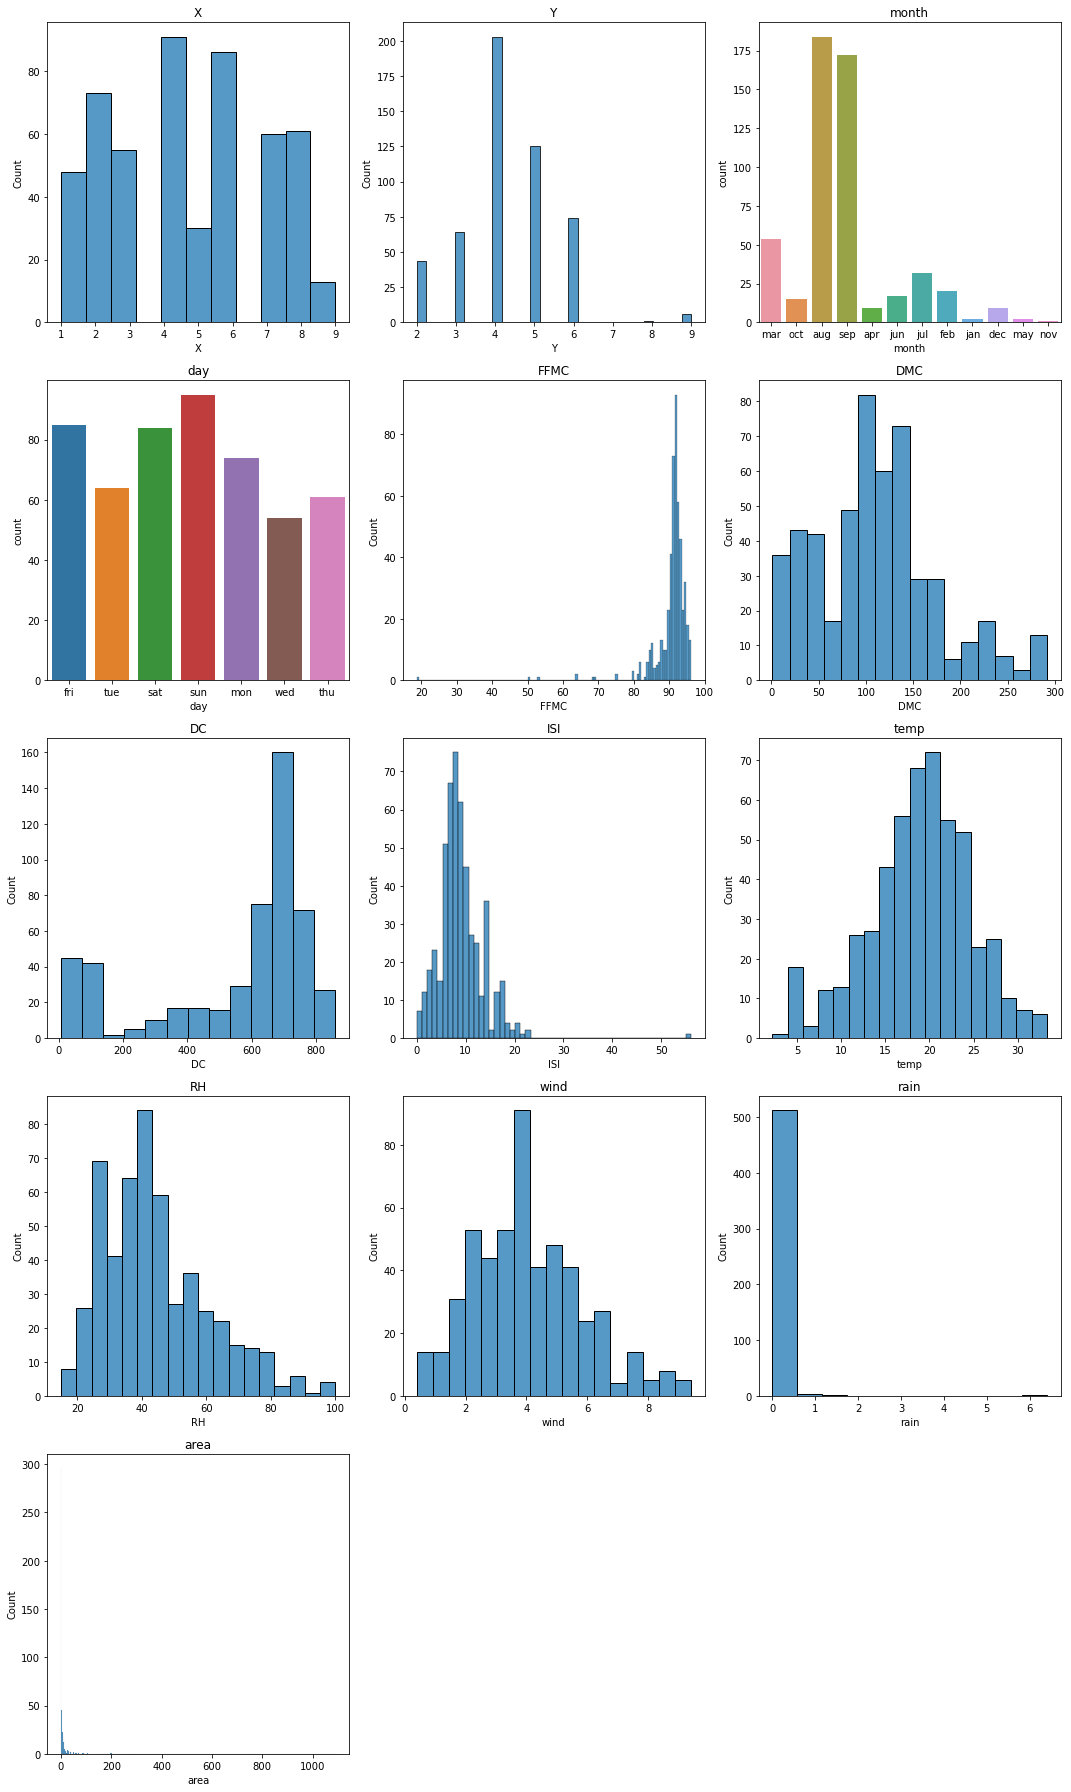

In [15]:
total_features = combined_wine.shape[1]  
rows = (total_features // 3) + 1  
cols = 3  
  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
axes = axes.flatten()  
  
for idx, column in enumerate(forest_fire.columns):  
    if forest_fire[column].dtype in [np.number, int, float]:  # Check if the feature is numeric  
        sns.histplot(data=forest_fire, x=column, kde=False, ax=axes[idx])  
    else:  
        sns.countplot(data=forest_fire, x=column, ax=axes[idx])  
    axes[idx].set_title(column)  
  

for idx in range(total_features, len(axes)):  
    fig.delaxes(axes[idx])  

plt.tight_layout()  
plt.show()  


Let's draw boxplots for all numeric variables. For each variable, we will have one with outlier and one without outliers using showfliers = False command

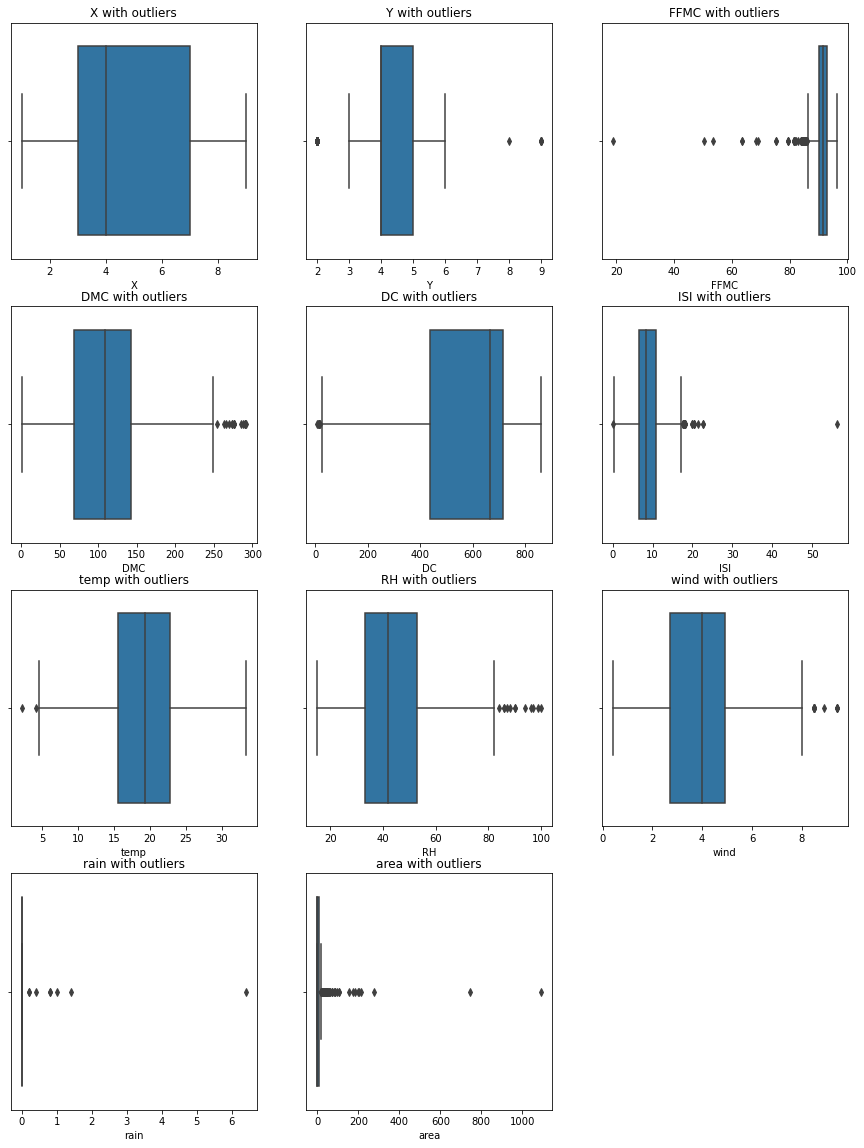

In [16]:
numeric_features = forest_fire.select_dtypes(include=[np.number]).shape[1]  
rows = (numeric_features // 3) + 1  
cols = 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
axes = axes.flatten()  

# with outliers
for idx, column in enumerate(forest_fire.select_dtypes(include=[np.number]).columns):  
    sns.boxplot(data=forest_fire, x=column, ax=axes[idx])  
    axes[idx].set_title(f'{column} with outliers')  

for idx in range(numeric_features, len(axes)):  
    axes[idx].remove()  


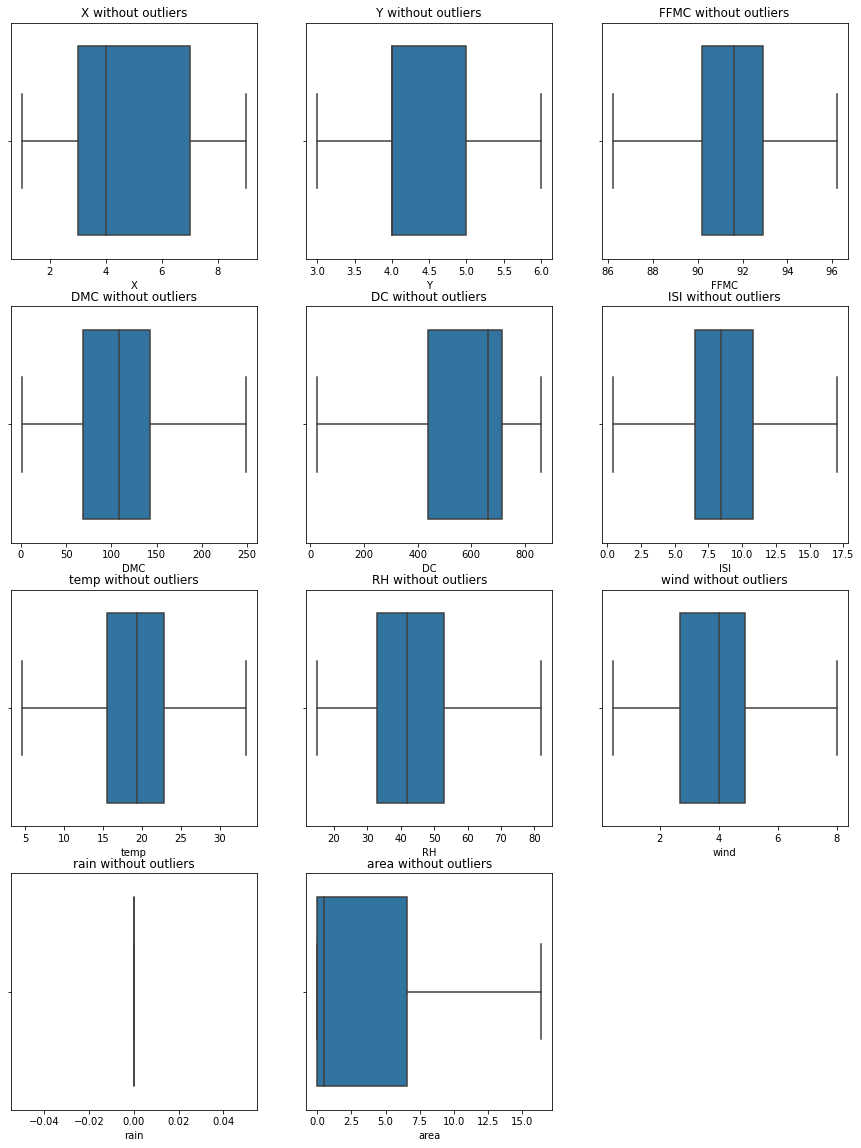

In [17]:
numeric_features = forest_fire.select_dtypes(include=[np.number]).shape[1]  
rows = (numeric_features // 3) + 1  
cols = 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
axes = axes.flatten()    

# without outliers
for idx, column in enumerate(forest_fire.select_dtypes(include=[np.number]).columns):  
    sns.boxplot(data=forest_fire, x=column, ax=axes[idx],showfliers = False)  
    axes[idx].set_title(f'{column} without outliers')  

for idx in range(numeric_features, len(axes)):  
    axes[idx].remove()  
    

## 2.3 Conceptual Questions

1. From the boxplot without outliers, which features has a significantly different distribution
from others? Why?
    - Rain and Area are the 2 features that have different distributions from others.
    - Rain shows a very narrow distribution, which makes it stands out. The rain distribution reflects the frquent occurence of no-rain days in the dataset, which is common in forest fire contexts.
    - Area shows a skewed to the right distribution, the distance from the median to Q3 is much larger than the distance from Q1 to median. And the area's distribution is highly asymmetric unlike other features which have more balanced distributions around their medians.
2. What does the outlier in the features mean? If you remove the outliers from the dataset,
what problems might arise?
The meaning of outliers for each outliers could be summarized as below table: 


| Feature | Meaning of Outliers |
|---------|---------------------|
| X, Y | Unusual or rarely observed locations in the park |
| FFMC (Fine Fuel Moisture Code) | Extremely dry or wet fine fuel conditions |
| DMC (Duff Moisture Code) | Unusually high or low moisture content in duff layers |
| DC (Drought Code) | Exceptional drought conditions or unusually wet periods |
| ISI (Initial Spread Index) | Extremely high or low potential for fire spread |
| temp | Unusually high or low temperatures |
| RH (Relative Humidity) | Exceptionally dry or humid conditions |
| wind | Unusually strong wind speeds |
| rain | Rare heavy rainfall events |
| area | Exceptionally large fires or very small spot fires |

- Removing outliers could cause loss of important information. Extreme events often have the most impacts. If the extereme events were removed, it could be hard to understand and predict severe fire behavior. For example, larger fires (outliers in the 'area' feature) are often the most destructive and costly. Removing them could lead to underestimating potential risks. 
-  Removing outliers could artificially reduce the variance in the dataset, potentially leading to overly optimistic error estimates in statistical models



3. Create a histogram for only FFMC after removing all the values outside of range [88,
96].


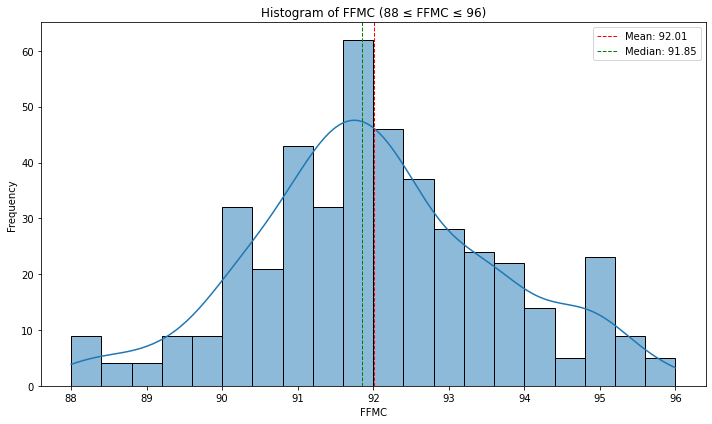

In [18]:
filtered_ffmc = forest_fire[(forest_fire['FFMC'] >= 88) & (forest_fire['FFMC'] <= 96)]['FFMC']

plt.figure(figsize=(10, 6))
sns.histplot(filtered_ffmc, bins=20, kde=True)

plt.title('Histogram of FFMC (88 ≤ FFMC ≤ 96)')
plt.xlabel('FFMC')
plt.ylabel('Frequency')

# Add vertical lines for mean and median
plt.axvline(filtered_ffmc.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {filtered_ffmc.mean():.2f}')
plt.axvline(filtered_ffmc.median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {filtered_ffmc.median():.2f}')

plt.legend()
plt.tight_layout()
plt.show()


4. What distribution does the new histogram follow?
- The new histogram appears to follow an approximately normal distribution. It has a roughly bell-shaped curve, which is characteristic of a normal distribution. The mean and median are close to each other, further supporting this observation. However, there seems to be a slight skew or asymmetry, which suggests it might not be a perfect normal distribution. To confirm the exact distribution, additional statistical tests would be necessary.